In [385]:
import h5py
from gqp_mc import data as Data 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [386]:
NUM_GAL = 10
DATA_DIR = '/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/'
DM = 1000
N_WALKERS = 10
N_RUN = 10000

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

In [387]:
def opener(name_preset,lower_dir):
    #lower dir: spec_bgs0/, spec_none/
    gal = []
    for idx in range(NUM_GAL):
        name = name_preset+str(idx)+".hdf5"
        f = h5py.File(DATA_DIR+lower_dir+name,'r')
        gal.append(f)
        
    return gal

In [388]:
spec_bgs0 = opener("lgal.spec.noise_bgs0.vanilla.",'spec_bgs0/')
spec_none = opener("lgal.spec.noise_none.vanilla.",'spec_none/')

In [389]:
print(spec_bgs0[0].keys())

<KeysViewHDF5 ['flux_data', 'flux_ivar_data', 'flux_model', 'mcmc_chain', 'priors', 'redshift', 'theta_1sig_minus', 'theta_1sig_plus', 'theta_2sig_minus', 'theta_2sig_plus', 'theta_med', 'wavelength_data', 'wavelength_model']>


In [390]:
specs,meta = Data.Spectra(sim='lgal',noise = 'bgs0', lib = 'bc03', sample = 'mini_mocha')
print(meta.keys())

dict_keys(['galid', 't_lookback', 'sfh_disk', 'sfh_bulge', 'Z_disk', 'Z_bulge', 'logM_disk', 'logM_bulge', 'logM_total', 't_age_MW', 'Z_MW', 'redshift', 'cosi', 'tau_ism', 'tau_bc', 'vd_disk', 'vd_bulge', 'logM_fiber', 'airmass', 'moon_alt', 'moon_ill', 'moon_sep', 'seeing', 'sun_alt', 'sun_sep', 'texp_total', 'transp', 'wave_sky', 'sbright_sky'])


In [391]:
input_mass = meta['logM_total'][:NUM_GAL]

In [392]:
def data(specs):
    data = []
    for spec in specs:
        data.append(spec['mcmc_chain'][...][:,0])
    return data

In [393]:
sb_mass = data(spec_bgs0) #list of inferred masses for each galaxy with bgs0 noise
sn_mass = data(spec_none) #list of inferred masses for each galaxy without noise

In [394]:
def hist_plotter(spec_photo,gal_idx,sample,step = 1000):
    plt.figure(figsize=(12,9))
    N=100
    colors = plt.cm.copper_r(np.linspace(0,1,100))
    r1= round(sample.min())
    r2= round(sample.max())
    for n in range(NUM_GAL*N_WALKERS):
        plt.hist(sample[:(1+n)*step],bins=50,histtype='step',color=colors[n],density='True',linewidth=1.2,label = str(step*(1+n)))
        plt.xlabel('$log M_*$',fontdict=font)
        plt.ylabel('Frequency',fontdict=font)
    plt.title(spec_photo + ' $galaxy #$'+str(gal_idx),fontdict=font)
    plt.savefig(spec_photo + ' galaxy #' +str(gal_idx) +' histogram')
    plt.show()

In [395]:
def perc_plotter(spec_photo,gal_idx,sample,step=1000):
    plt.figure(figsize=(12,9))
    n_it = N_WALKERS*NUM_GAL
    x_axis = np.arange(n_it)*1000
    y,up_perc,lo_perc=[],[],[]

    for n in range(NUM_GAL*N_WALKERS):
        up_perc.append(np.percentile(sample[:step*(1+n)],84.1))
        lo_perc.append(np.percentile(sample[:step*(1+n)],15.9))
        y.append(np.median(sample[:step*(1+n)]))
        
    up_perc = np.subtract(up_perc,y)
    lo_perc = np.subtract(y,lo_perc)
    yerr = np.vstack((lo_perc,up_perc))
    plt.xlabel('$N_{iteration}$',fontdict=font)
    plt.ylabel('Median',fontdict=font)
    plt.title(spec_photo + ' $galaxy #$' + str(gal_idx) + ' convergence schematic',fontdict=font)
    plt.errorbar(x_axis,y,yerr=yerr,fmt='.k',ecolor='gray', elinewidth=1)
    plt.savefig(spec_photo + ' galaxy #' + str(gal_idx) + ' convergence schematic')
    plt.show()

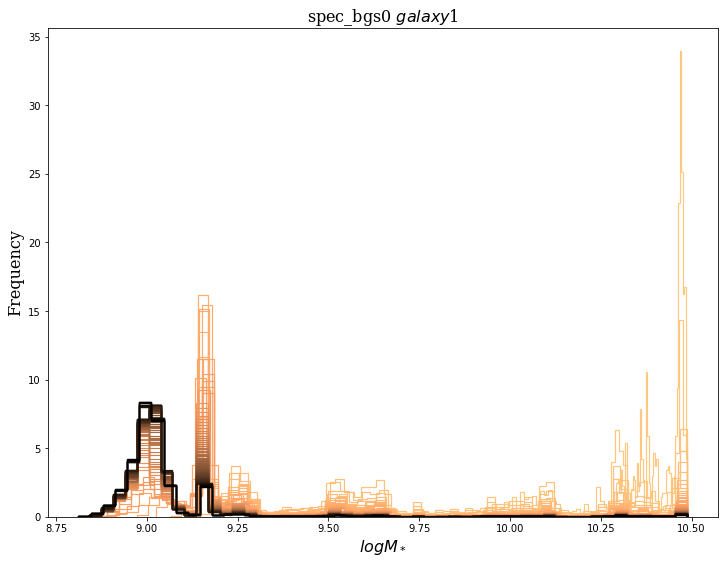

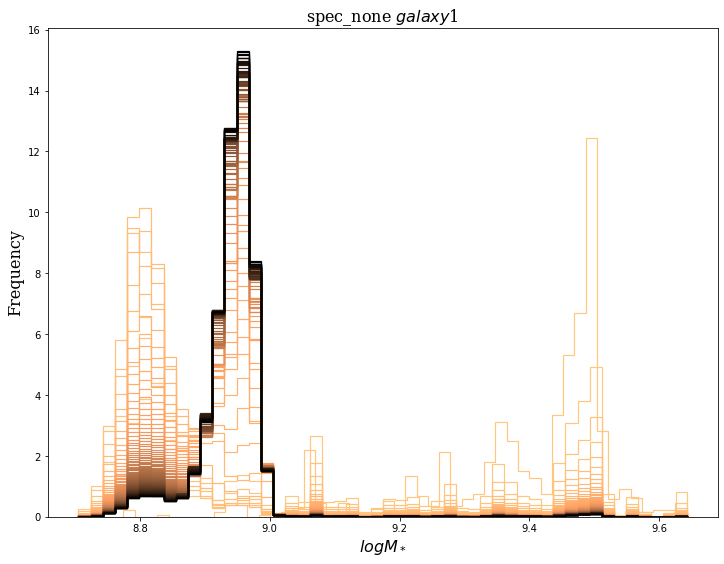

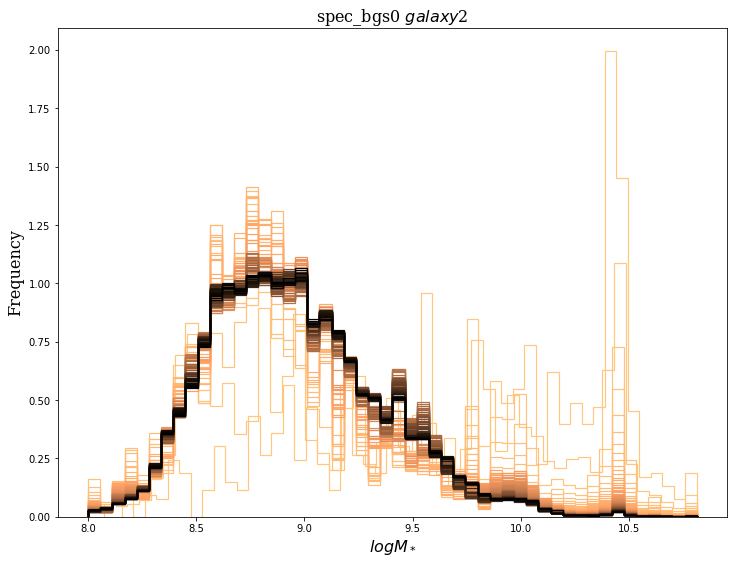

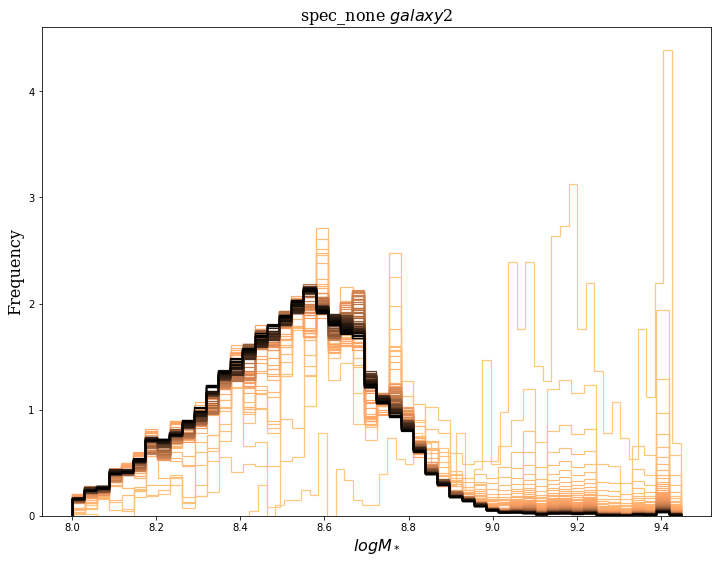

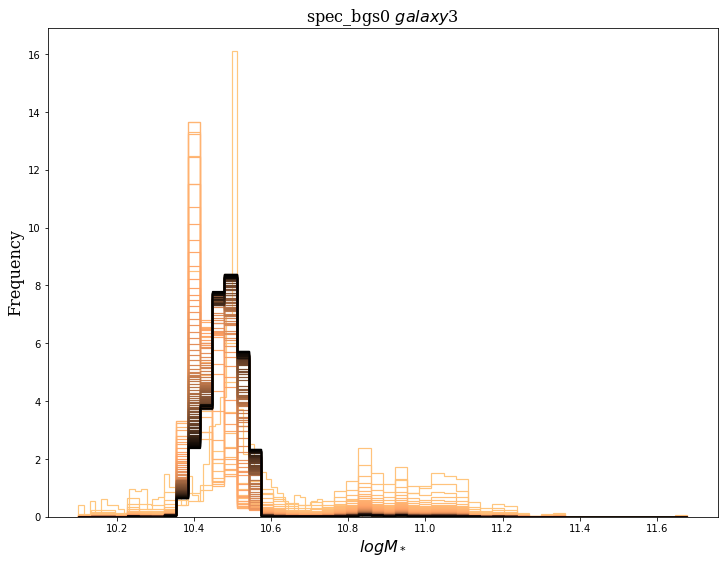

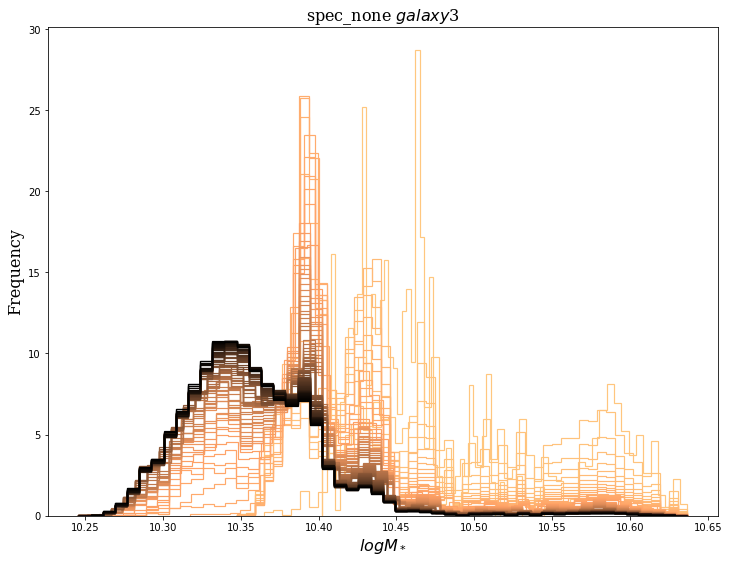

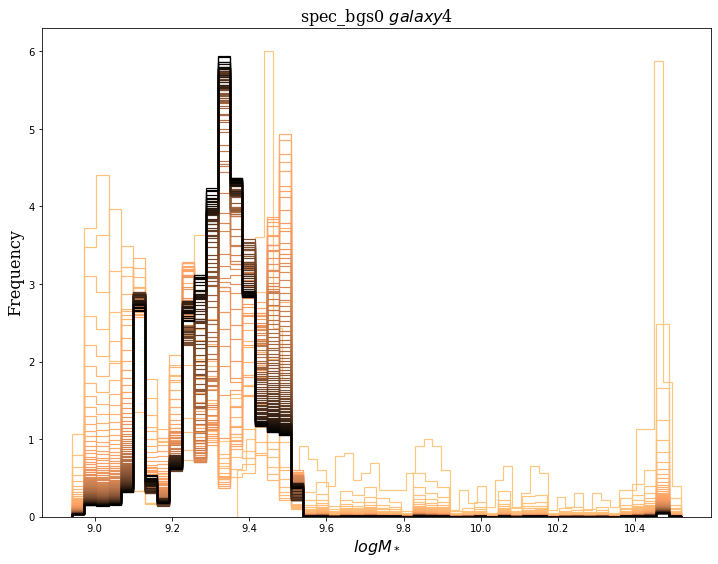

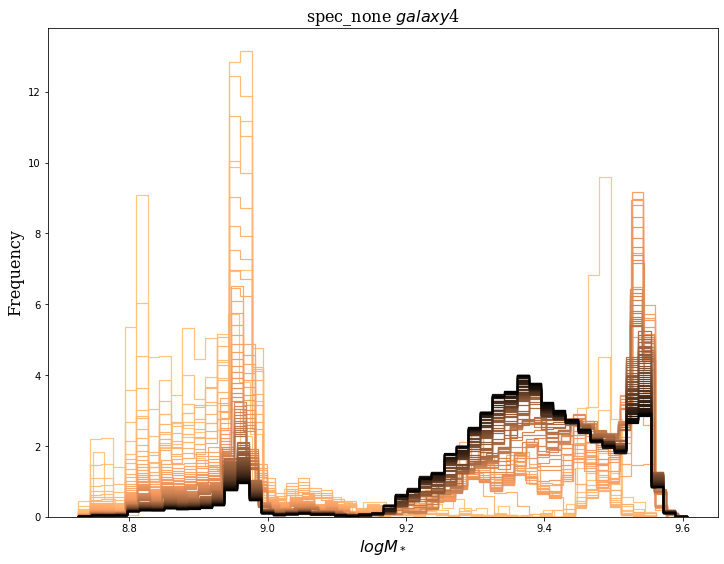

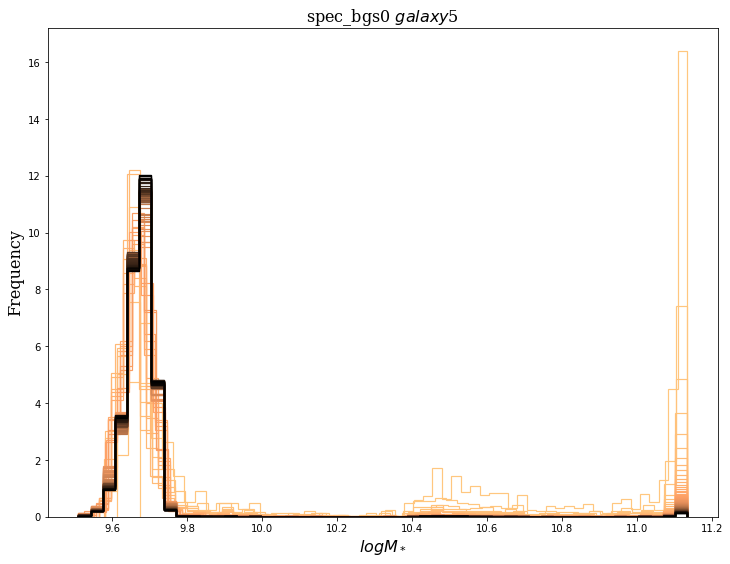

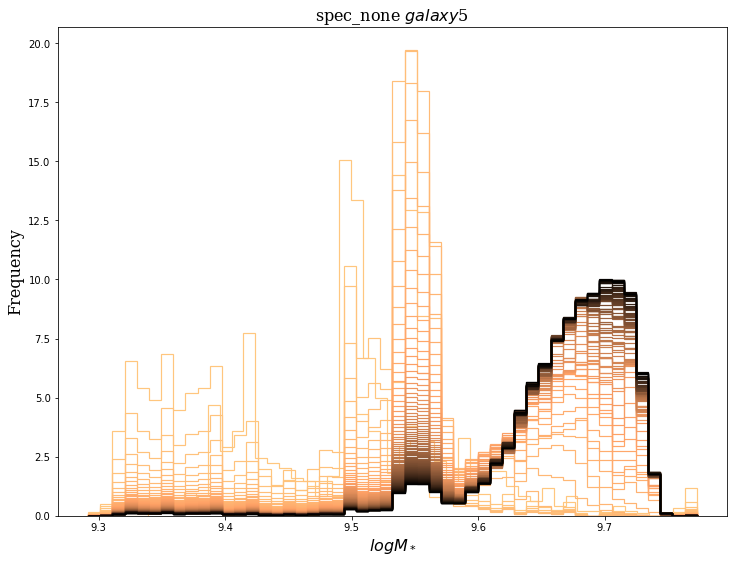

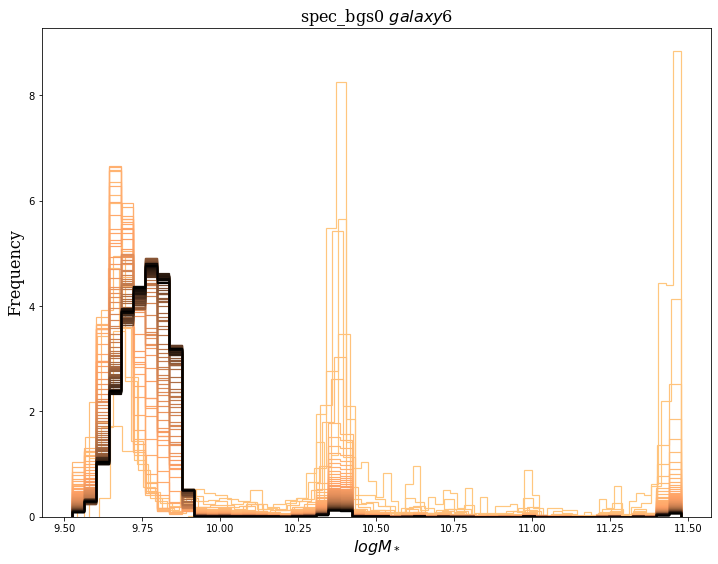

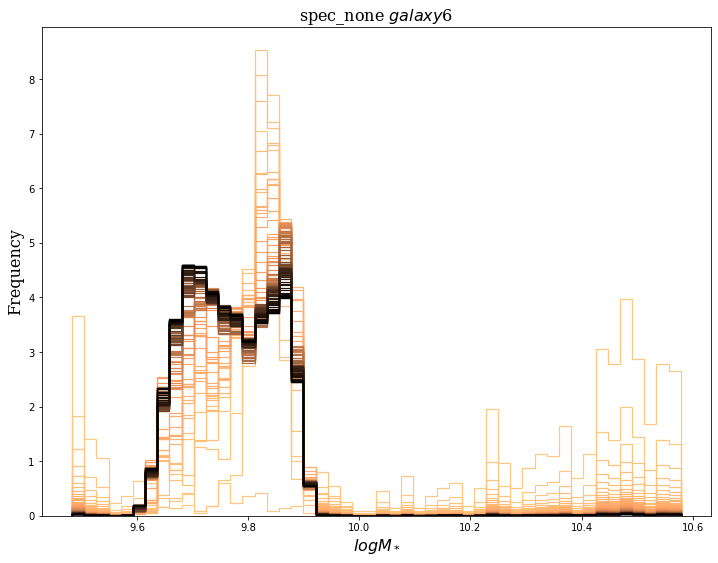

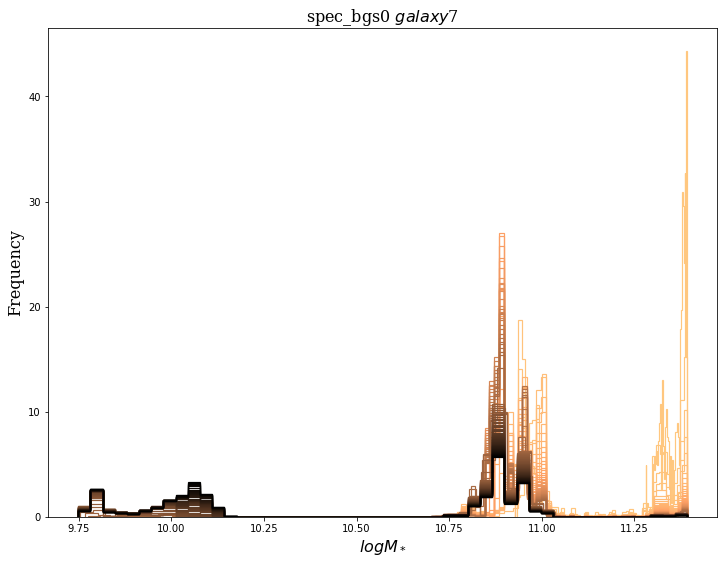

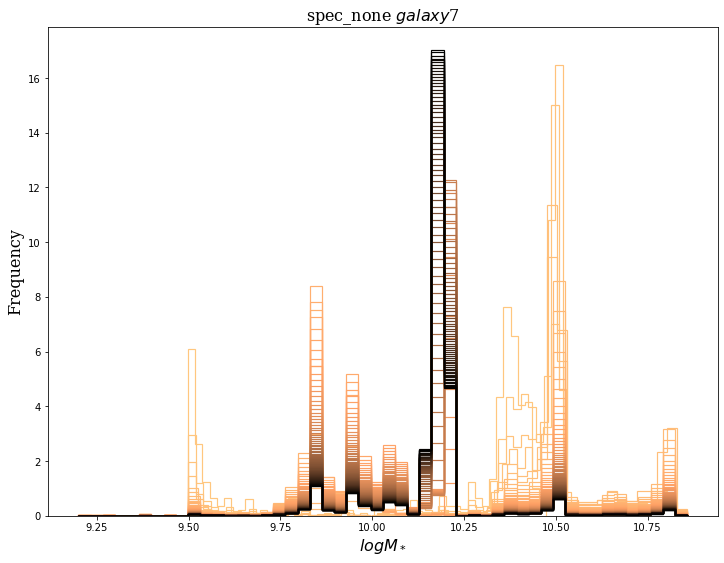

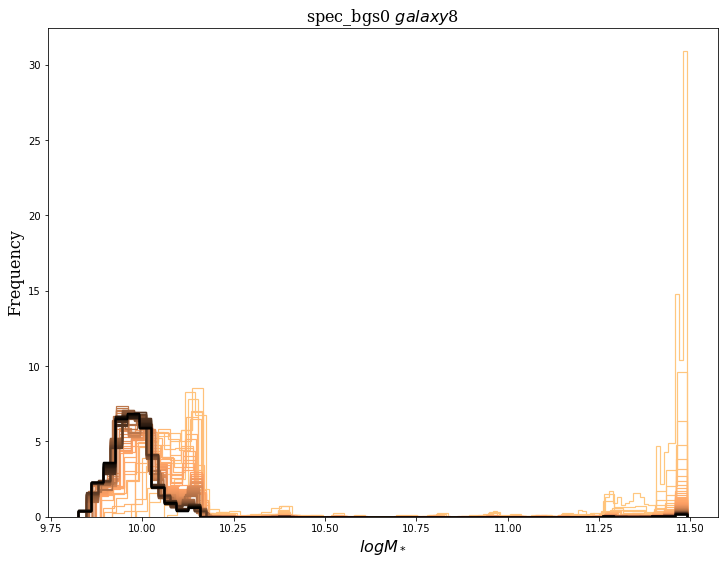

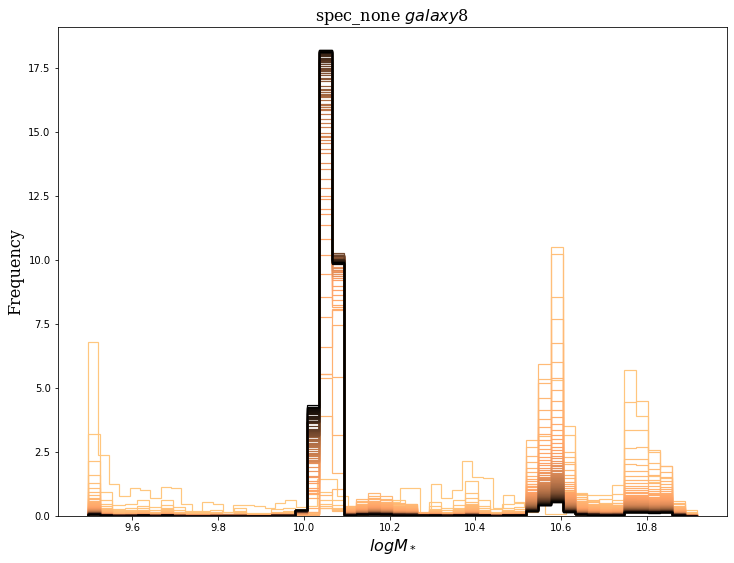

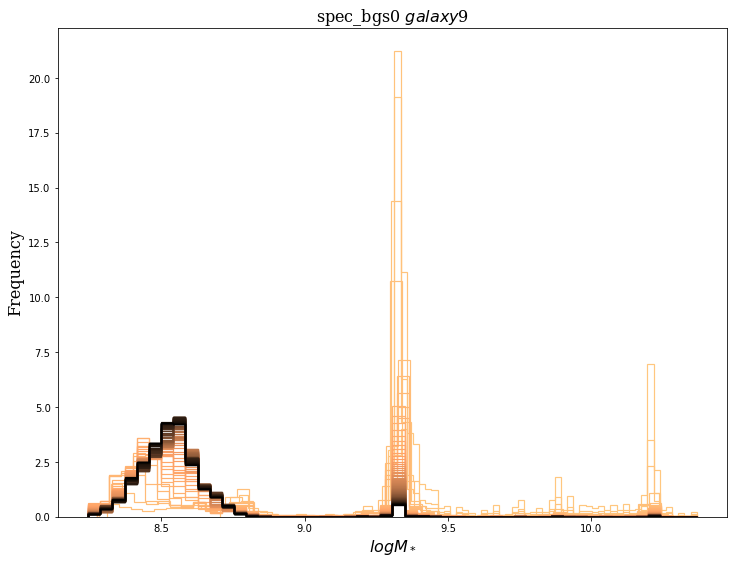

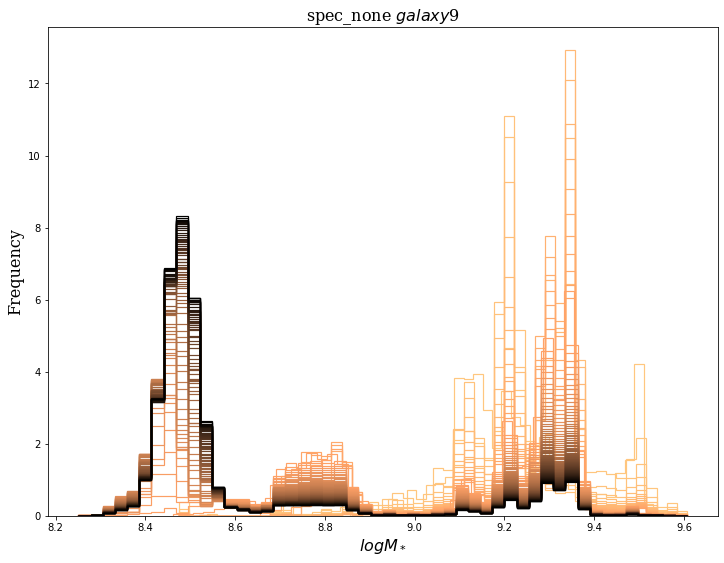

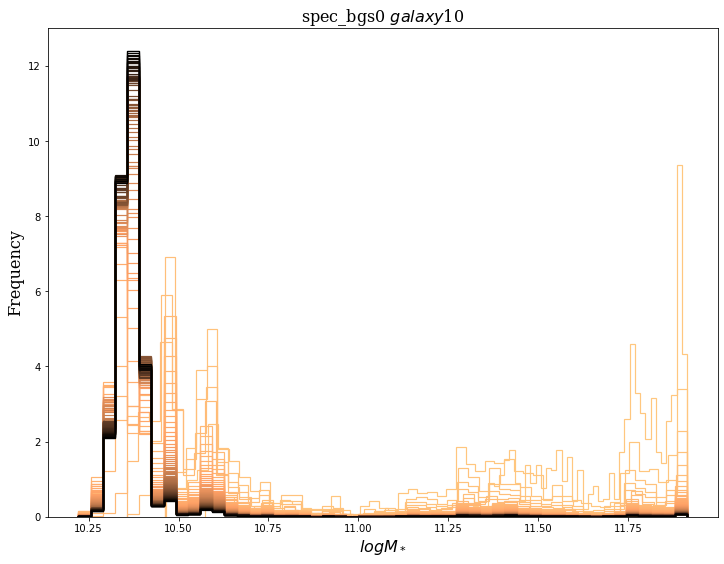

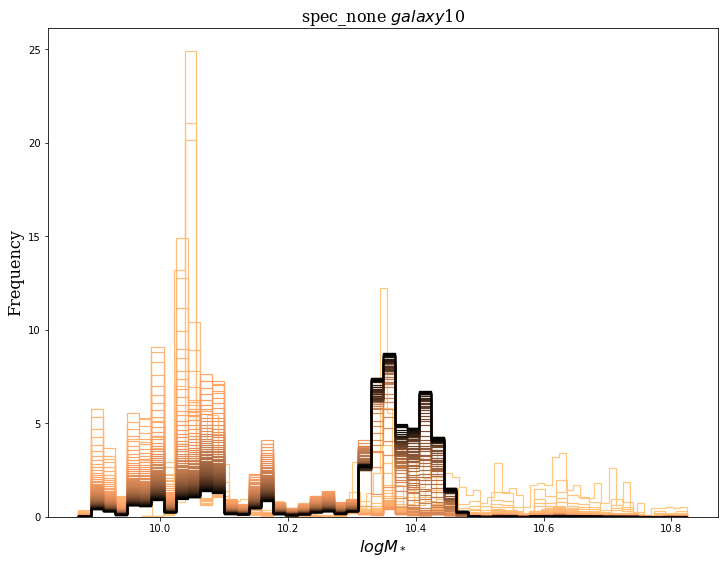

In [396]:
for idx in range(NUM_GAL):
    hist_plotter('spec_bgs0',idx+1,sb_mass[idx])
    hist_plotter('spec_none',idx+1,sn_mass[idx])

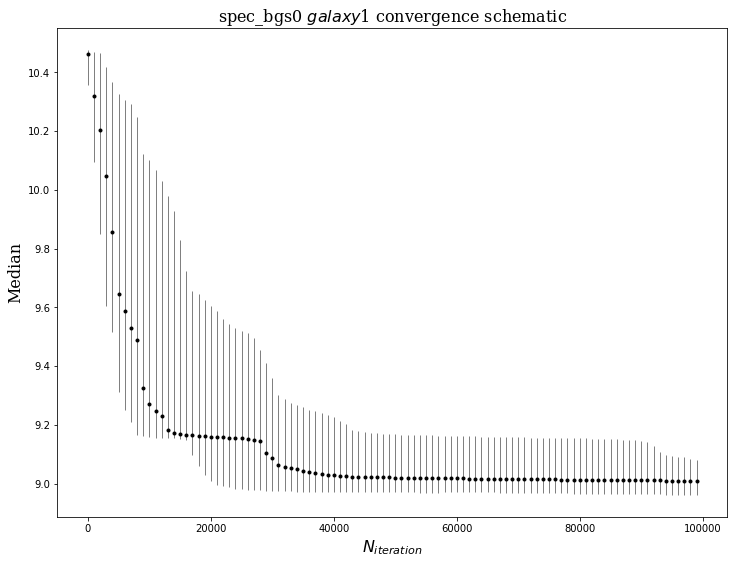

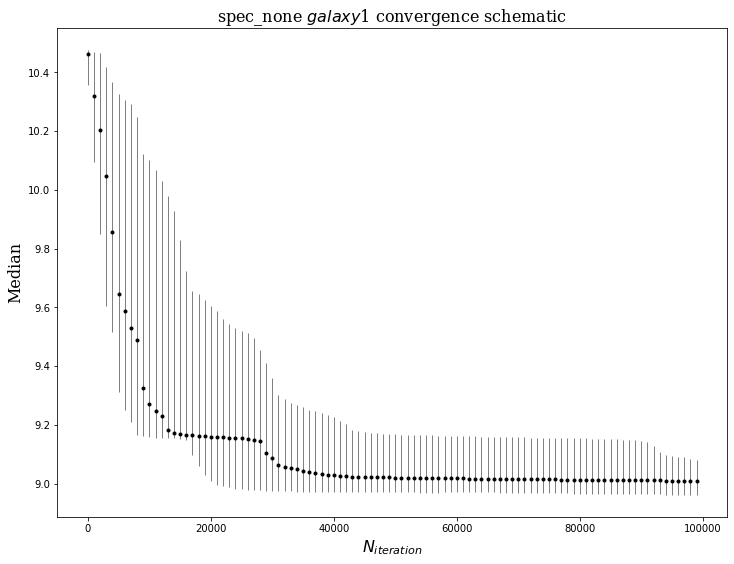

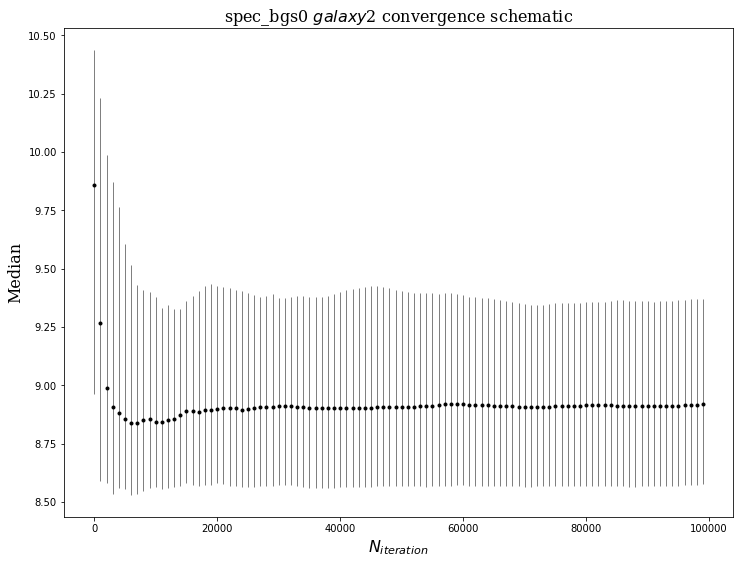

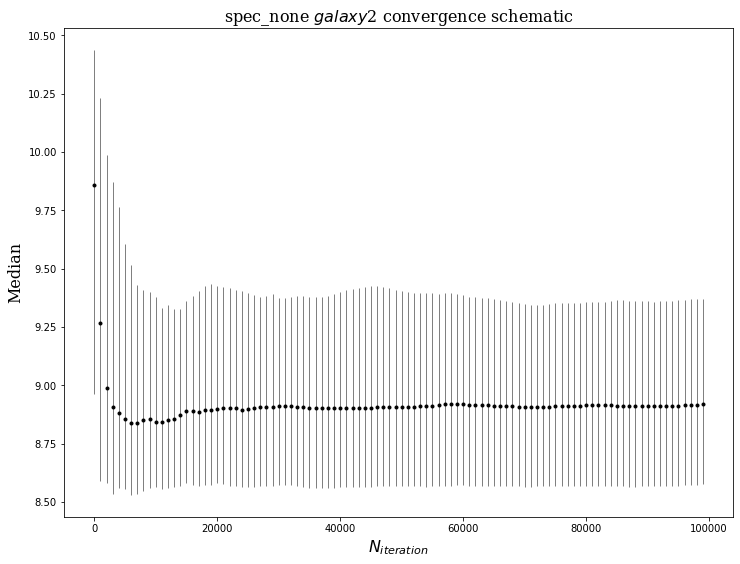

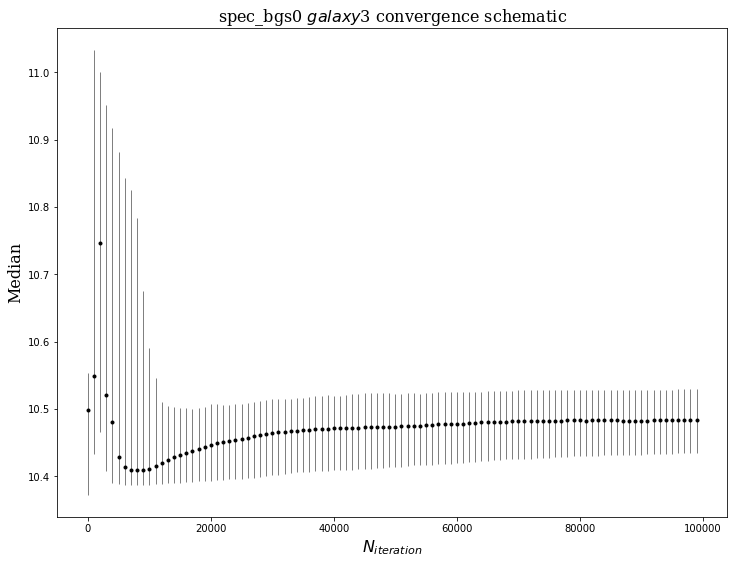

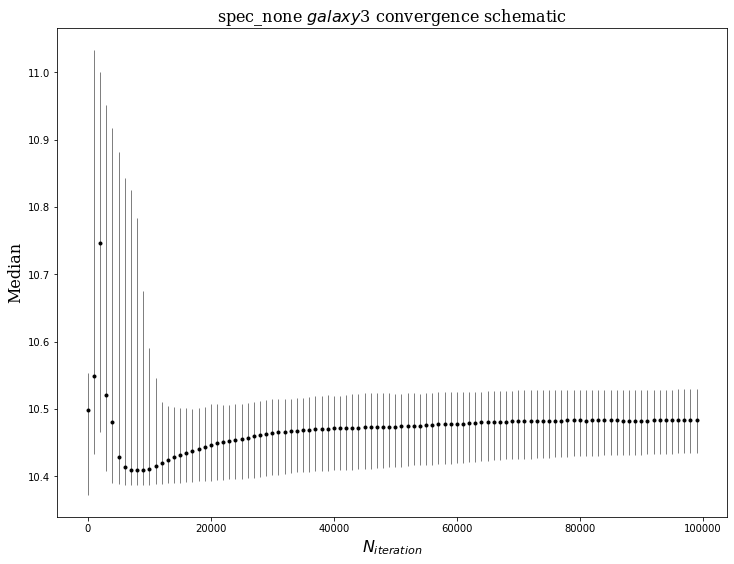

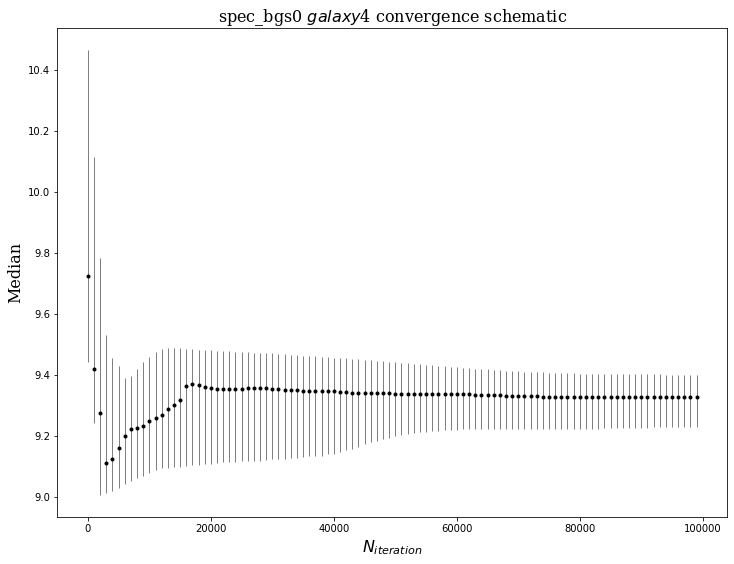

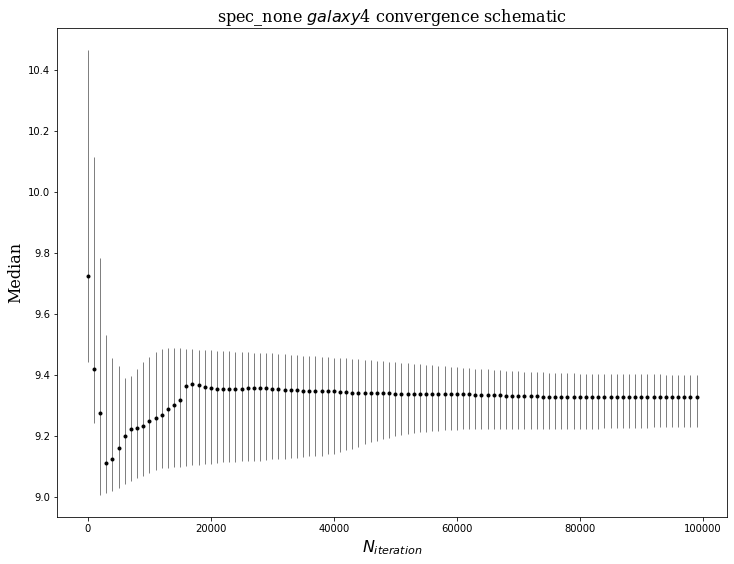

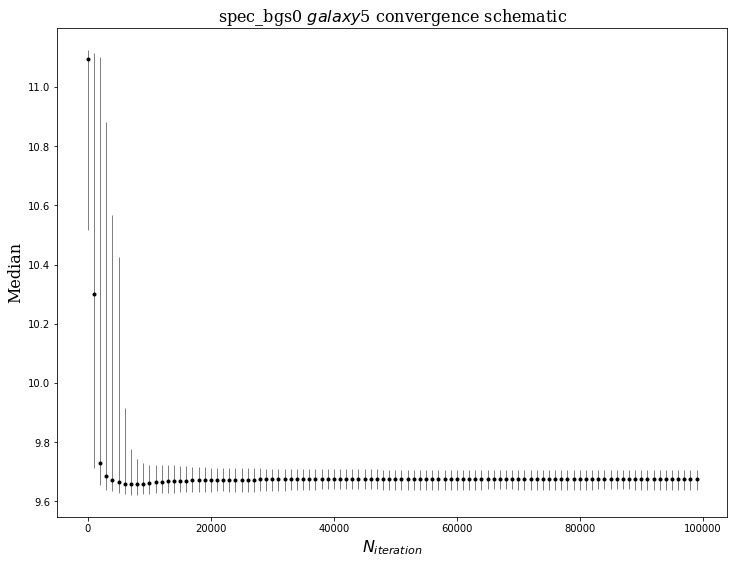

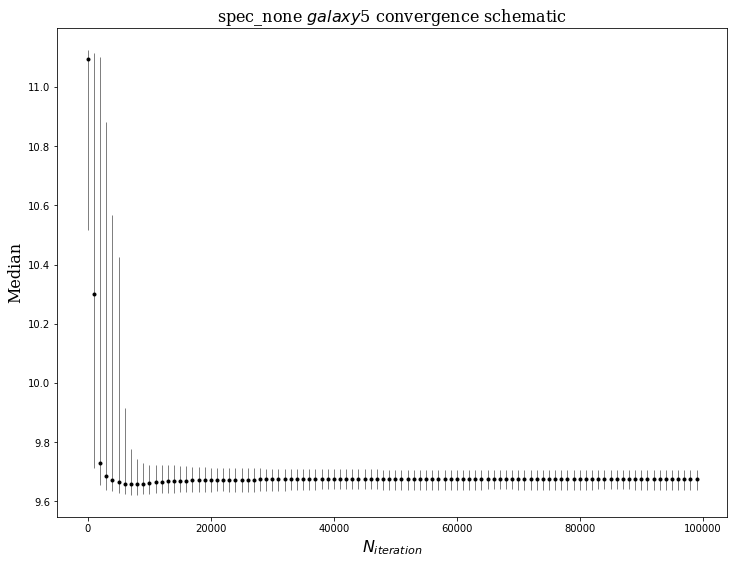

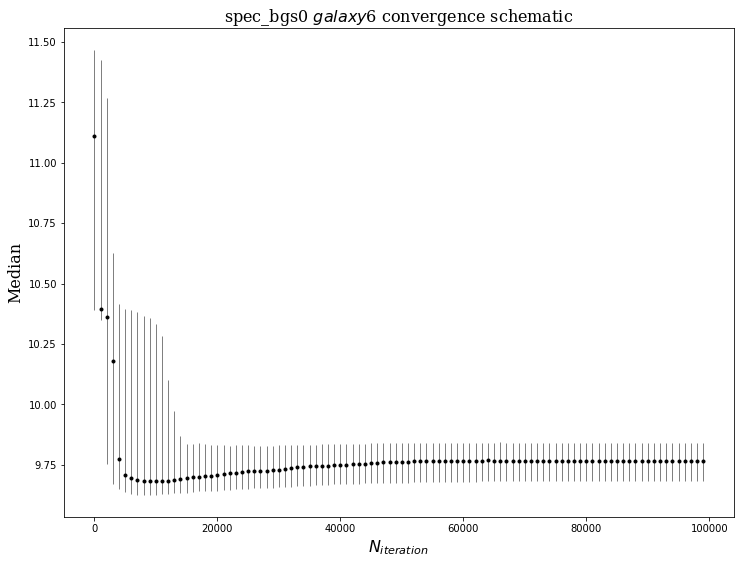

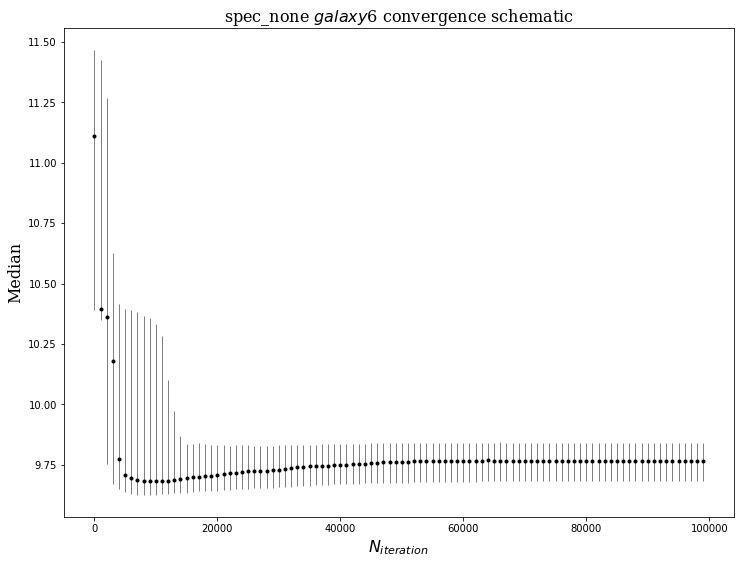

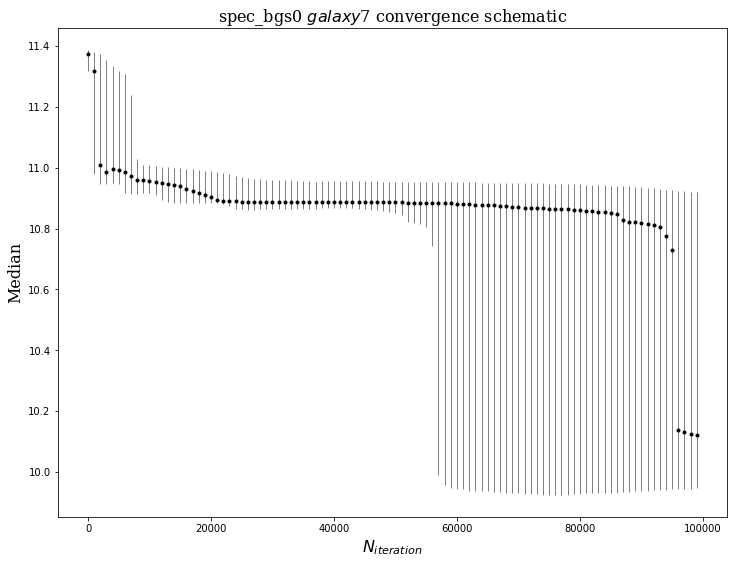

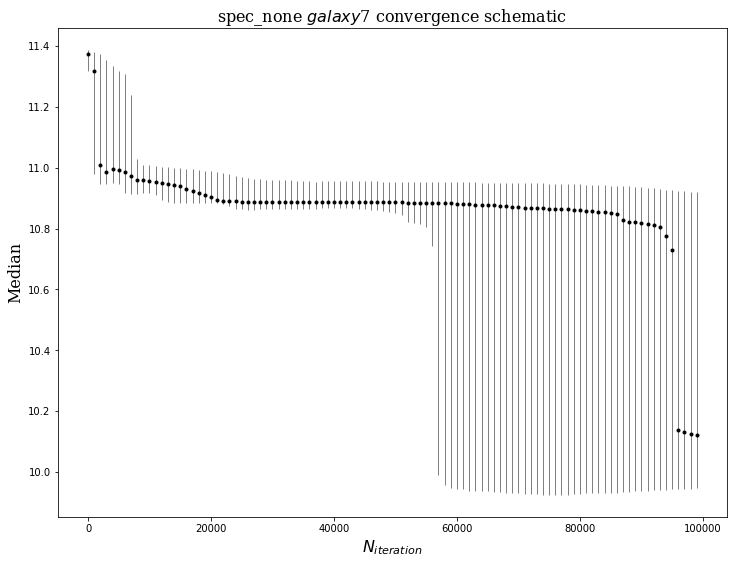

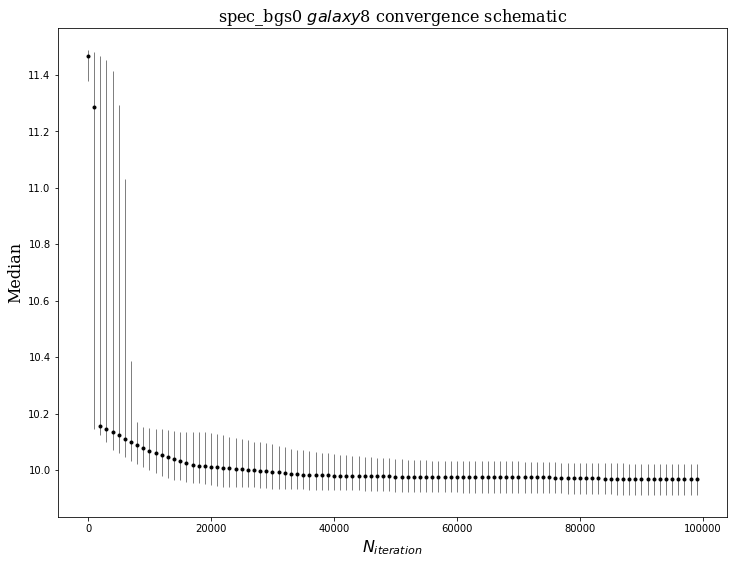

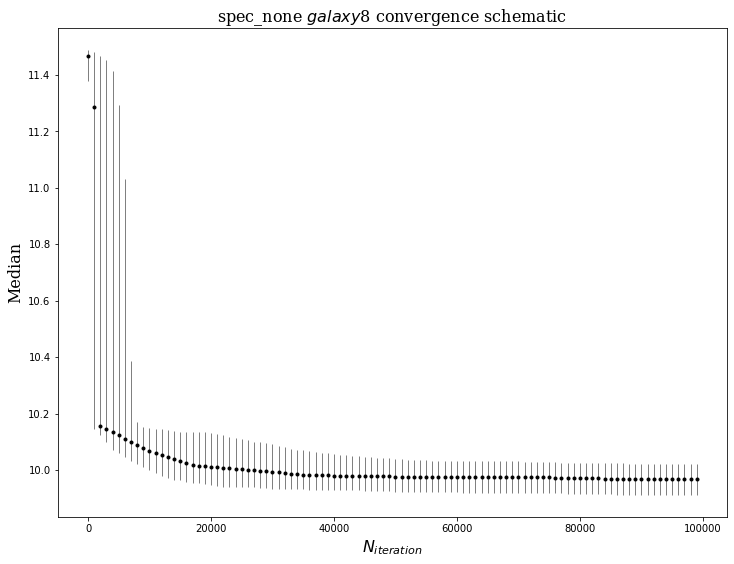

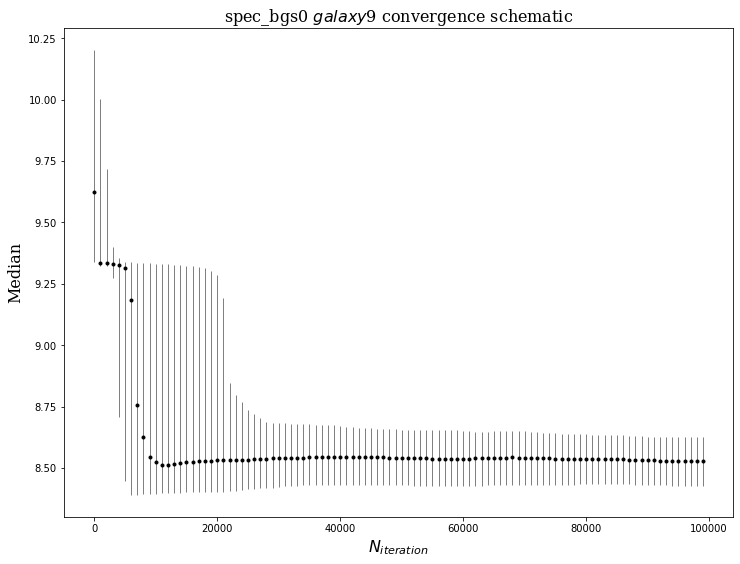

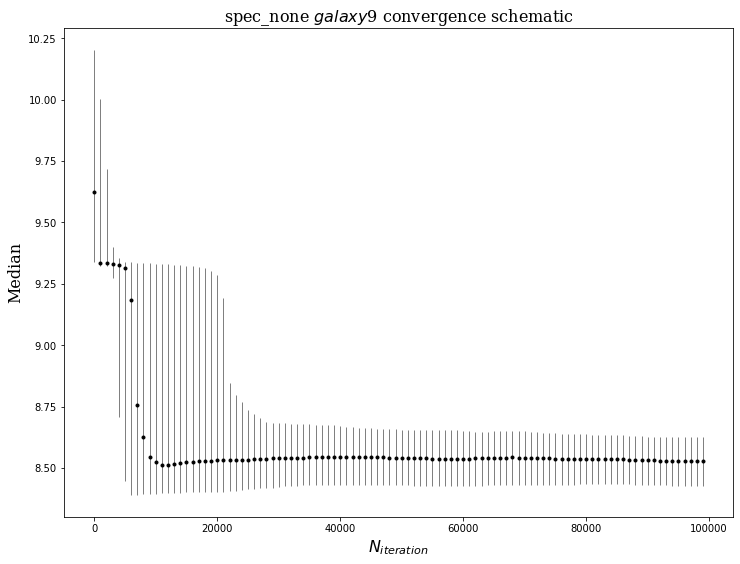

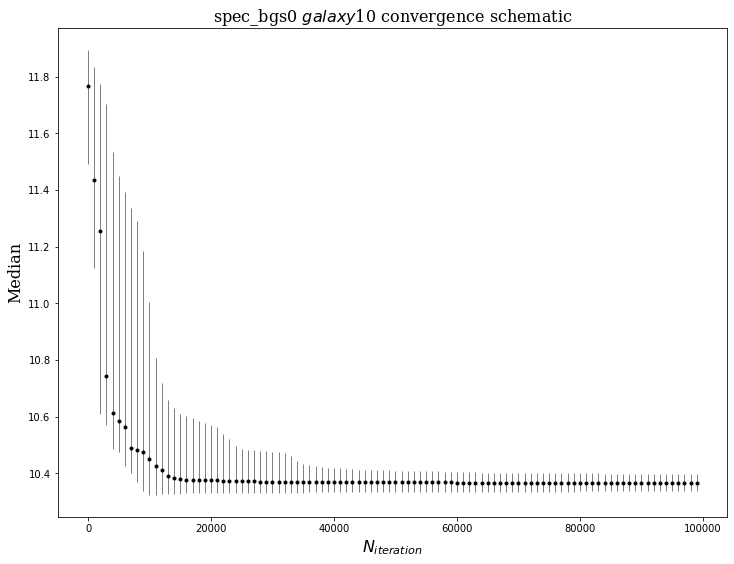

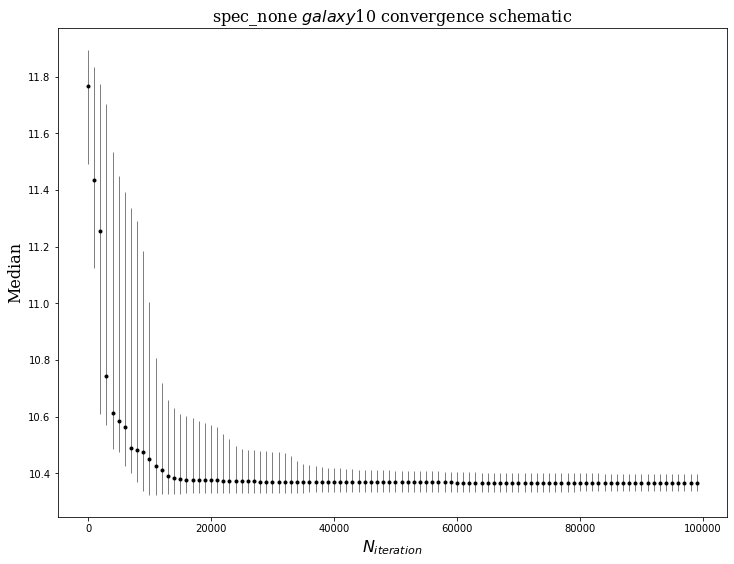

In [398]:
for idx in range(NUM_GAL):
    perc_plotter('spec_bgs0',idx+1,sb_mass[idx])
    perc_plotter('spec_none',idx+1,sb_mass[idx])